In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


# Clean and Analyze Employee Exit Surveys

In this project we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We will search in the dataset in order to find the answer of the following questions:


-Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

-Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We need to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. In the guided steps, we'll aim to do most of the data cleaning and get you started analyzing the first question.


In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

In [3]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

Let's look a little into these 2 surveys.

In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [5]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


-There are 56 columns and 822 rows in this dataset.

-32 columns out of 56 have missing values.

-Excluding the first column (ID), the columns type are either boolean or object.


In [6]:
dete_survey['Skills'].value_counts()

A     372
SA    228
N      94
D      59
SD     47
M      11
Name: Skills, dtype: int64

In [7]:
dete_survey.describe(include='all')

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
count,822.000000,822,822,822,822,817,455,822,126,817,...,813,766,793,798,811,16,3,7,23,32
unique,NaN,9,25,51,46,15,8,9,14,5,...,6,6,6,2,10,1,1,1,1,1
top,NaN,Age Retirement,2012,Not Stated,Not Stated,Teacher,Primary,Metropolitan,Education Queensland,Permanent Full-time,...,A,A,A,Female,61 or older,Yes,Yes,Yes,Yes,Yes
freq,NaN,285,344,73,98,324,161,135,54,434,...,401,253,386,573,222,16,3,7,23,32
mean,411.693431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,237.705820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,411.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,616.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In some columns we can see that the information is filled with a classication: A, SA, N, D, SD, M.

In [8]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [9]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


-There are 72 columns and 702 rows in this dataset.

-Most of the columns have missing values.

In dete_survey there some values written as 'Not Stated' instead of Nan. Let's correct that by changing them into Nan.

In [10]:
print(dete_survey['DETE Start Date'])

0            1984
1      Not Stated
2            2011
3            2005
4            1970
          ...    
817          1977
818          1980
819          2009
820          2001
821    Not Stated
Name: DETE Start Date, Length: 822, dtype: object


In [11]:
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [12]:
print(dete_survey['DETE Start Date'])

0      1984.0
1         NaN
2      2011.0
3      2005.0
4      1970.0
        ...  
817    1977.0
818    1980.0
819    2009.0
820    2001.0
821       NaN
Name: DETE Start Date, Length: 822, dtype: float64


Then, let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with.

In [13]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [14]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [15]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [16]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

We got rid of columns that are not enough relevant for our analysis and that are quite difficult to interpret.

Now we'll standardize the column names.

In [17]:
dete_survey_updated.columns=dete_survey_updated.columns.str.replace(' ','_').str.lower().str.strip()

In [18]:
dic={'Record ID': 'id','CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated=tafe_survey_updated.rename(mapper=dic,axis=1)

We just renamed the columns that we'll use in our analysis. Next, let's remove more of the data we don't need.

If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [19]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

For the dete datframe there are several types of resignation, let's put them together.

In [20]:
pattern_1=r'-Other reasons'
pattern_2=r'-Other employer'
pattern_3=r'-Move overseas/interstate'
dete_resignations=dete_survey_updated.copy()
dete_resignations['separationtype']=dete_resignations['separationtype'].str.replace(pattern_1,'')
dete_resignations['separationtype']=dete_resignations['separationtype'].str.replace(pattern_2,'')
dete_resignations['separationtype']=dete_resignations['separationtype'].str.replace(pattern_3,'')

In [21]:
dete_resignations['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [22]:
dete_resignations=dete_resignations[dete_resignations['separationtype']=='Resignation']
dete_resignations['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

In [23]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [24]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation']

In [25]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

We grouped all the resignation rows and deleted all the others.

Now, before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies.

Let's look into the cease_date column in dete_resignations.

In [26]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

We'll put the dates by year only.

In [27]:
pattern=r'([1-2][0-9]{3})'
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract(pattern)

In [28]:
dete_resignations['cease_date']=dete_resignations['cease_date'].astype(float)

In [29]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Let's check the values in the dete_start_date columns in dete_resignations and the cease_date column in tafe_resignations. 

In [30]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [31]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

From the work we did in the last screen, we can verify:

    -There aren't any major issues with the years.
    -The years in each dataframe don't span quite the same number of years.

Let's see if employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction. And what about employees who have been at the job longer ?

We'll create a new column 'institute_service' in the dete dataframe to measure the length of employement of workers.

<AxesSubplot:xlabel='Time of employement', ylabel='Frequency'>

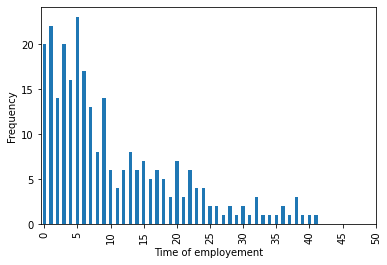

In [32]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
ti=[0,5,10,15,20,25,30,35,40,45,50]
dete_resignations['institute_service'].value_counts(ascending=False,sort=False).sort_index().plot(kind='bar',xticks=ti,xlabel='Time of employement',ylabel='Frequency')

We can see that there is a higher number of resignation for people who were employed less than 6 years.

Now we will create a new column in tafe_resignations that will be called 'dissatisfied'. It will take into account the 2 columns 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction'.

In [33]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [34]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In these columns we either have a string which can be translated into a True or a "-" which can be a False. There is also some Nan.

In [35]:
def updates(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True

In [36]:
factors=['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
factors_bool=tafe_resignations[factors].applymap(updates)

In [37]:
diss=factors_bool.any(axis=1,skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied']=diss.copy()

In [50]:
tafe_resignations_up['dissatisfied'].head()

3    False
4    False
5    False
6    False
7    False
Name: dissatisfied, dtype: bool

We'll do the same for dete dataframe and create a 'dissatisfied' column.

In [51]:
dete_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                'physical_work_environment', 'lack_of_recognition',
                'lack_of_job_security', 'work_location',
                'employment_conditions', 'work_life_balance', 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_columns].any(axis=1)

dete_resignations_up = dete_resignations.copy()

In [52]:
dete_resignations_up['dissatisfied'].head()

3     False
5      True
8     False
9      True
11    False
Name: dissatisfied, dtype: bool

Done !

Now, we're finally ready to combine our datasets! Our end goal is to aggregate the data according to the institute_service column, so when you combine the data, think about how to get the data into a form that's easy to aggregate.

First, we'll add to each dataframe a column with either 'DETE' or 'TAFE' to identify from where the row is coming from. Then we'll combine the 2 datframes.

In [39]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'
combined=pd.concat([dete_resignations_up,tafe_resignations_up])
combined_update=combined.dropna(axis=1,thresh=500)

In [40]:
combined_update['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
14.0                   6
12.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
36.0                   2
25.0                   2
30.0                   2
26.0                   2
28.0                   2
49.0                   1


Now we clean this column by categorizing as below:

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

In [41]:
combined_update['institute_service']=combined_update['institute_service'].astype(str).str.replace('Less than 1 year','1.0').str.replace('1-2','1.0').str.replace('3-4','3.0').str.replace('5-6','5.0').str.replace('7-10','7.0').str.replace('11-20','11.0').str.replace('More than 20 years','20.0')
combined_update['institute_service']=combined_update['institute_service'].replace('nan',np.nan)

In [42]:
combined_update['institute_service']=combined_update['institute_service'].astype(float)

In [43]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3 :
        return 'New'
    elif val > 2 and val < 7 :
        return 'Experienced'
    elif val > 6 and val < 11 :
        return 'Established'
    else :
        return 'Veteran'

In [44]:
combined_update['service_cat']=combined_update['institute_service'].apply(categorize)

In [45]:
combined_update['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

Now we've got the categorization of resigning people.

In [46]:
perc=combined_update.pivot_table(values='dissatisfied',index='service_cat')
perc.head()

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


<AxesSubplot:xlabel='Category', ylabel='Proportion'>

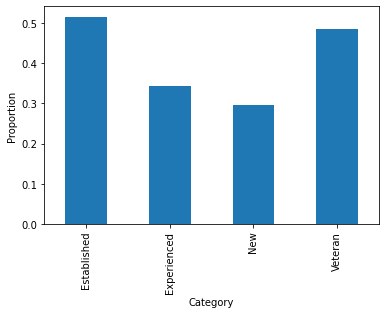

In [47]:
%matplotlib inline
perc.plot(kind='bar',xlabel='Category',ylabel='Proportion',legend=False)

We can see that resignement caused by dissatisfaction is impacting more established and veteran workers.